<a href="https://colab.research.google.com/github/anuskhattak/Customer-Churn-Prediction/blob/main/telco_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.shape)

(7043, 21)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data Cleaning

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Nulls in TotalCharges:", df['TotalCharges'].isnull().sum())

Nulls in TotalCharges: 11


In [8]:
# Handle null values
df.dropna(subset=['TotalCharges'], inplace=True)
print("Total Nulls now:", df.isnull().sum().sum())
print(f"Rows after cleaning: {df.shape[0]}")

Total Nulls now: 0
Rows after cleaning: 7032


# **Exploratory Data Analysis**

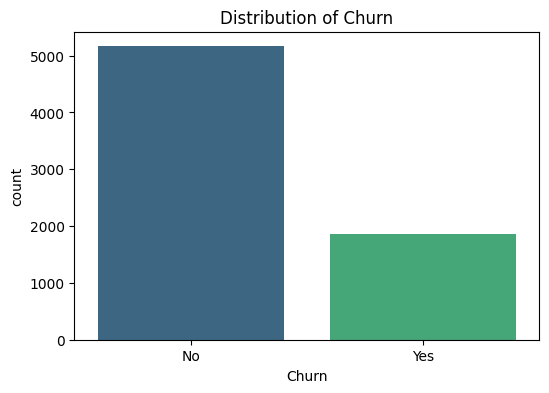

Churn distribution
Churn
No     5163
Yes    1869
Name: count, dtype: int64
percentage
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [9]:
# Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

churn_counts = df['Churn'].value_counts()
print('Churn distribution')
print(churn_counts)
print('percentage')
print(df['Churn'].value_counts(normalize=True) * 100)

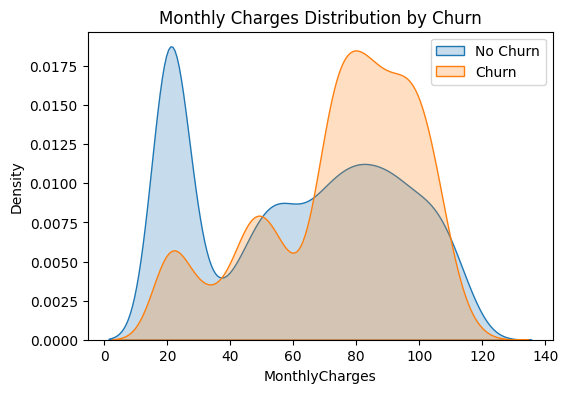

In [10]:
# Monthly Charges vs Churn (KDE Plot)
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)
plt.title('Monthly Charges Distribution by Churn')
plt.legend()
plt.show()

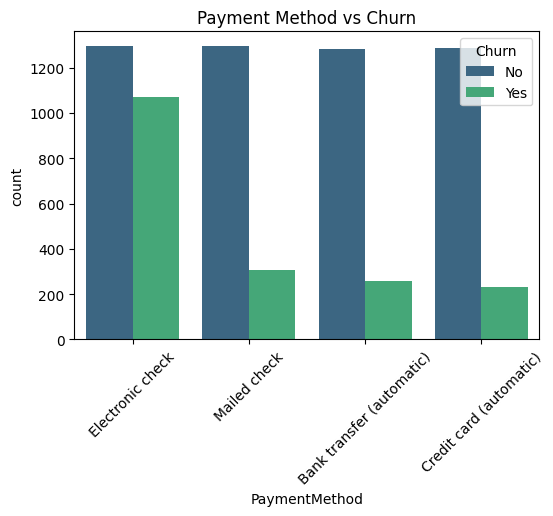

In [11]:
# Impact of Payment Method on Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Payment Method vs Churn')
plt.show()

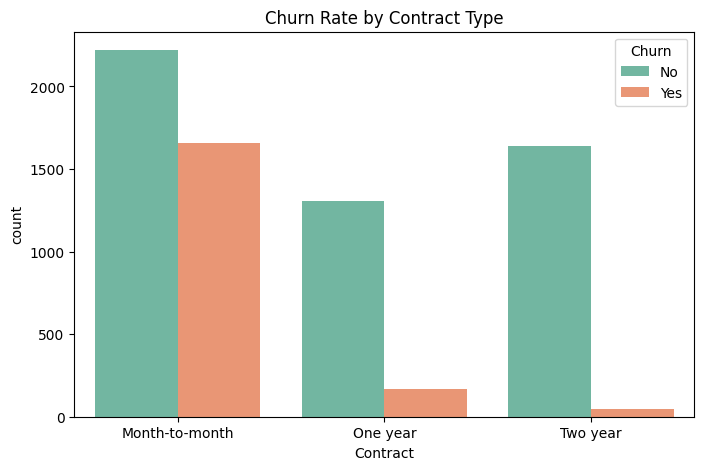

In [12]:
# Contract type vs churns
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.show()

Text(0, 0.5, 'Count')

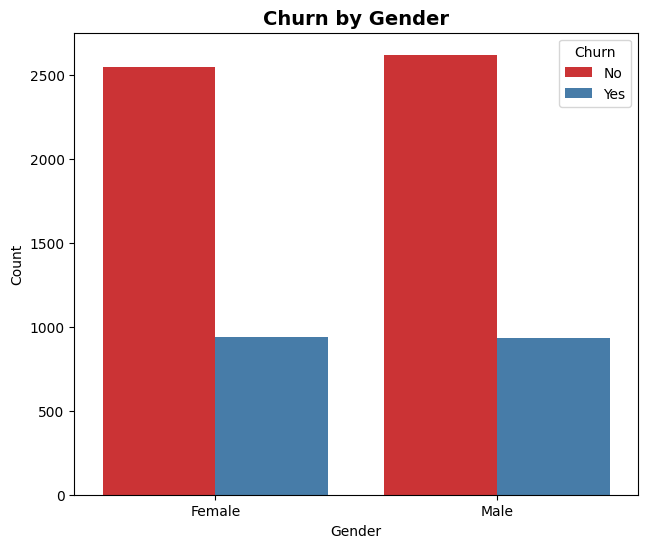

In [13]:

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')

Encoding

In [14]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


df[['gender', 'Churn', 'Partner']].head()

,gender,Churn,Partner
0,0,0,1
1,1,0,0
2,1,1,0
3,1,0,0
4,0,1,0


In [15]:
# OneHot Encoding multi-class categorical variable
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# Remove customerID as it's not useful for modeling
df.drop('customerID', axis=1, inplace=True)

# One-Hot Encoding apply
df_final = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Final data check karna
print(df_final.info())
print(f"New dataset shape: {df_final.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

# Machine learning Part

Feature scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [17]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [18]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Feature Scaling
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


print("Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain set churn distribution:")
print(y_train.value_counts())
print(f"\nTest set churn distribution:")
print(y_test.value_counts())

Data Split:
Training set: 5625 samples
Test set: 1407 samples

Train set churn distribution:
Churn
0    4130
1    1495
Name: count, dtype: int64

Test set churn distribution:
Churn
0    1033
1     374
Name: count, dtype: int64


model building

Random Forest

In [20]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"SMOTE ke baad Class 1 ka count: {sum(y_train_res == 1)}")

SMOTE ke baad Class 1 ka count: 4130


In [21]:
rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rf_bal.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [23]:
rf_pred_bal = rf_bal.predict(X_test)

In [24]:
print(classification_report(y_test, rf_pred_bal))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



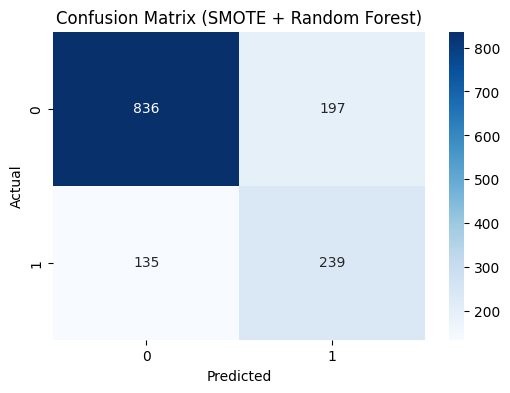

In [25]:
cm = confusion_matrix(y_test, rf_pred_bal)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTE + Random Forest)')
plt.show()